In [5]:
from matplotlib import container
from numpy.lib import info
from IPython.display import HTML
from IPython.display import display

from ipywidgets import interactive
import ipywidgets as widgets
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as img

# Tomado de https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=false; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

Para mostrar/ocultar código presione <a href="javascript:code_toggle()">aquí</a>.''')

def maxH(k, m, y0):
    return k*(1-y0)**2/(2*m*9.81)+y0

def energias(k, m, y, y0):
    if y>=1:
        return [9.81*m*y, (k*(1-y0)**2/2+y0*9.81*m)-9.81*m*y, 0]
    elif(y==1):
        return [9.81*m, (k*(1-y0)**2/2+y0*9.81*m)-9.81*m, 0]
    else:
        return[9.81*m*y, (k*(1-y0)**2/2+y0*9.81*m)-9.81*m*y-(k*(1-y)**2/2), k*(1-y)**2/2]
        

def gravitacional(m, h):
    return m*9.81*h

def elastica(k, x):
    return k*x**2/2

def graficoGravitacional():

    display (tag)

    def mostrarGrafico(masa, altura):
        infoGravitacional = gravitacional(masa, altura)
        fig, ax = plt.subplots (dpi=120)
        plt.bar(["Energía (J)"], [infoGravitacional])
        plt.ylim(0, 300)
        ax.set_title('Energia potencial de una partícula')  
        plt.show() 
         

    masaEtiqueta = widgets.Label (value="Masa $(kg)$:")
    masaSlider = widgets.FloatSlider(min=0, max=3, step=0.1, value=2.0)
    cajaMasa = widgets.HBox([masaEtiqueta, masaSlider])
    alturaEtiqueta = widgets.Label (value="Altura $(m)$:")
    alturaSlider = widgets.FloatSlider(min=0, max=10, step=0.1, value=5.0)
    cajaAltura = widgets.HBox([alturaEtiqueta, alturaSlider])
    salida = widgets.interactive_output(mostrarGrafico, {'masa':masaSlider,
                                                                  'altura':alturaSlider})

    display(cajaMasa, cajaAltura, salida)

def graficoElastica():

    display (tag)

    def mostrarGrafico(k, x):
        infoGravitacional = elastica(k, x)
        fig, ax = plt.subplots (dpi=120)
        plt.bar(["Energía (J)"], [infoGravitacional])
        plt.ylim(0, 400)
        ax.set_title('Energia potencial de una partícula')  
        plt.show() 
         

    kEtiqueta = widgets.Label (value="Constante k $(N/m)$:")
    kSlider = widgets.FloatSlider(min=0, max=30, step=0.1, value=10.0)
    cajaK = widgets.HBox([kEtiqueta, kSlider])
    xEtiqueta = widgets.Label (value="Distancia x $(m)$:")
    xSlider = widgets.FloatSlider(min=0, max=5, step=0.1, value=4.0)
    cajaX = widgets.HBox([xEtiqueta, xSlider])
    salida = widgets.interactive_output(mostrarGrafico, {'k':kSlider,
                                                                  'x':xSlider})

    display(cajaX, cajaK, salida)

def graficoMecanica():

    display (tag)
    
    def mostrarGrafico(k, m, t):

        tiempo = t / 1000

        w = np.sqrt (k / m)

        desplazamiento = -7 * np.cos (w * tiempo) 
        fuerza = k * desplazamiento 
        elástica = fuerza * desplazamiento /2

        trabajoGravedad = - m * 9.81 * (desplazamiento + 7)

        trabajoTotal = elástica + trabajoGravedad


        altura = desplazamiento + 7
        gravitacional = altura * m * 9.81

        cinética = k * 49 / 2 - elástica - trabajoGravedad - gravitacional

        mecánica = elástica + trabajoGravedad + gravitacional + cinética

        fig, ax = plt.subplots (dpi=120)    
        plt.xlim (-2, 9)
        plt.ylim (-1, 20)
        ax.set_title('Energía Mecánica de una partícula')


        # Resorte
        deltaX = desplazamiento + 9
        x = np.linspace (0, deltaX,100)
        y = np.sin(20*np.pi*x/deltaX)  
        
        # Caja
        ax.add_patch(
            patches.Rectangle((-0.5, deltaX), 1, 3,
                facecolor = 'red',fill=True) )


        # Barra Elástica 
        ax.add_patch(
            patches.Rectangle((1.5, 0), 1,  elástica/45,
                facecolor = 'c',fill=True) )
        #Resultado Elástica
        ax.text(2, 1, "E. P. Elástica=" + str(round (elástica,1)) + " J", rotation=90)
    

        # Barra Gravitacional 
        ax.add_patch(
            patches.Rectangle((3, 0), 1,  gravitacional/45,
                facecolor = 'c',fill=True) )
        #Resultado Gravitacional
        ax.text(3.5, 1, "E. P. Gravitacional=" + str(round (gravitacional,1)) + " J", rotation=90)

        # Barra Cinética 
        ax.add_patch(
            patches.Rectangle((4.5, 0), 1,  cinética/45,
                facecolor = 'c',fill=True) )
        #Resultado Cinética
        ax.text(5, 1, "E. Cinética=" + str(round (cinética,1)) + " J", rotation=90)

        # Barra Trabajo Gravedad 
        ax.add_patch(
            patches.Rectangle((6, 16), 1,  trabajoGravedad/45,
                facecolor = 'c',fill=True) )
        #Resultado Cinética
        ax.text(6.5, 1, "Trabajo Gravedad=" + str(round (trabajoGravedad,1)) + " J", rotation=90)

        # Barra Mecánica 
        ax.add_patch(
            patches.Rectangle((7.5, 0), 1,  mecánica/45,
                facecolor = 'c',fill=True) )
        #Resultado Mecánica
        ax.text(8, 1, "Energía Mecánica=" + str(round (mecánica,1)) + " J", rotation=90)


        ax.plot (y,x)  

        ax.axis ("off")

        plt.show()  
        return


    kEtiqueta = widgets.Label (value="Constante k $(N/m)$:")
    kSlider = widgets.FloatSlider(min=15, max=30, step=1, value=20.0)
    cajaK = widgets.HBox([kEtiqueta, kSlider])

    masaEtiqueta = widgets.Label (value="Masa $(kg)$:")
    masaSlider = widgets.FloatSlider(min=1, max=5, step=0.1, value=5)
    cajaMasa = widgets.HBox([masaEtiqueta, masaSlider])

    play = widgets.Play(value=0, min=0, max=np.pi * 2000, step=50, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(ms)$:")
    tieSlider = widgets.FloatSlider(min=0, max=np.pi * 2000,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])
    
    salida = widgets.interactive_output(mostrarGrafico, {'k':kSlider, 'm': masaSlider, 't':tieSlider})

    display(cajaMasa, cajaK, cajaTiempo, play, salida)
    


# Energía Potencial

La energía potencial es la que describe energía que contiene o rodea un cuerpo en estudio pero depende de la posición. Es en cierto modo una forma en la que se almacena la energía de un cuerpo. La energía potencial da la posibilidad al transformarse de generar trabajo.

Existen varios tipos de energía potencial: gravitacional, elástica, eléctrica, etc.

## Gravitacional

Analicemos inicialmente la energía potencial gravitacional. Al alzar un objeto notamos como se requiere trabajo para moverse contra la gravedad. Una vez en este estado la gravedad hace su efecto energetico, entre mas alto a mayor velocidad llegará debido a la aceleración (no tomamos en cuenta fricción). Entendemos entonces que a mayor altura mayor será la energía potencial por lo tanto:

$$
U_p=mgh
$$

donde m es la masa, g la gravedad y h la altura

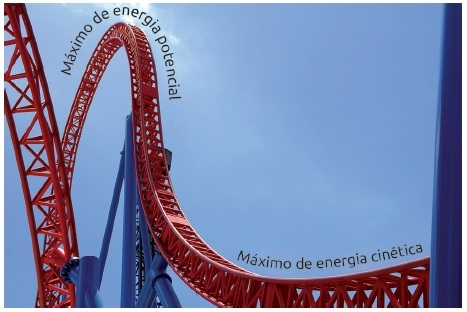

In [2]:
graficoGravitacional()

Output()

## Elástica

En el caso de energía potencial elástica recordamos que la energía es la integral de la fuerza por el desplazamiento, la fuerza esta dada por la multiplicación del desplazamiento y la constante k, por lo que entonces resolviendo dicha integral respecto a la posición nos da:

$$
U_e=\dfrac{kx^2}{2}
$$

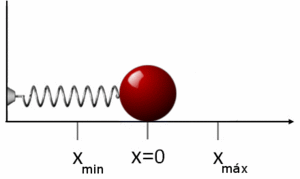

In [3]:
graficoElastica()

Output()

## Conservación energía mecánica

La ley de la conservación de la energía mecánica se basa en los supuestos de que la energía no se pierde en formas de calor debido a la fricción o fuerzas disipativas, en vez esta solo se transforma entre energía potencial y cinética.

$$
\Delta K_1 + U_1 = \Delta K_2 + U_2
$$

En el siguiente ejemplo interactivo cabe destacar que un resorte de 1m se encuentra en y=0.

In [6]:
graficoMecanica()

Play(value=0, max=6283, step=50)

Output()

## Fuerzas no conservativas